In [2]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

In [3]:
data=pd.read_csv("ToyotaCorolla - MLR.csv")

In [4]:
data.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [6]:
data["HP"].value_counts()

HP
110    835
86     249
97     164
72      73
90      36
69      34
107     21
192     11
116      9
98       2
71       1
73       1
Name: count, dtype: int64

In [7]:
data["Fuel_Type"].value_counts()  # This is a categorical Column

Fuel_Type
Petrol    1264
Diesel     155
CNG         17
Name: count, dtype: int64

In [8]:
data["Automatic"].value_counts()  # This is a categorical Column

Automatic
0    1356
1      80
Name: count, dtype: int64

In [9]:
data["Doors"].value_counts()  # numerical Column

Doors
5    674
3    622
4    138
2      2
Name: count, dtype: int64

In [10]:
data["Gears"].value_counts() # numeric column

Gears
5    1390
6      43
3       2
4       1
Name: count, dtype: int64

In [11]:
data["Cylinders"].value_counts()  # All have same value hence can be ignored

Cylinders
4    1436
Name: count, dtype: int64

In [12]:
data1=data.drop(columns=["Cylinders","Gears","Automatic","Fuel_Type"]) #Dropping Categorical Columns and same value column

In [13]:
data1.head()

,Price,Age_08_04,KM,HP,cc,Doors,Weight
0,13500,23,46986,90,2000,3,1165
1,13750,23,72937,90,2000,3,1165
2,13950,24,41711,90,2000,3,1165
3,14950,26,48000,90,2000,3,1165
4,13750,30,38500,90,2000,3,1170


In [14]:
data1.rename(columns={"Age_08_04":"Age"},inplace=True) # Renaming Age column

In [15]:
data1

,Price,Age,KM,HP,cc,Doors,Weight
0,13500,23,46986,90,2000,3,1165
1,13750,23,72937,90,2000,3,1165
2,13950,24,41711,90,2000,3,1165
3,14950,26,48000,90,2000,3,1165
4,13750,30,38500,90,2000,3,1170
...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,1025
1432,10845,72,19000,86,1300,3,1015
1433,8500,71,17016,86,1300,3,1015
1434,7250,70,16916,86,1300,3,1015


In [16]:
data1=pd.DataFrame(data1,columns=['Age', 'KM', 'HP', 'cc',"Doors",'Weight','Price'] )

In [17]:
data1.corr()

,Age,KM,HP,cc,Doors,Weight,Price
Age,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.470253,-0.876590
KM,0.505672,1.000000,-0.333538,0.102683,-0.036197,-0.028598,-0.569960
HP,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.089614,0.314990
cc,-0.098084,0.102683,0.035856,1.000000,0.079903,0.335637,0.126389
Doors,-0.148359,-0.036197,0.092424,0.079903,1.000000,0.302618,0.185326
Weight,-0.470253,-0.028598,0.089614,0.335637,0.302618,1.000000,0.581198
Price,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.581198,1.000000


In [18]:
data1["Price"].corr(data1["Age"])

-0.8765904971436398

we can see Price and age show good Correlation 

C:\Users\amrit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


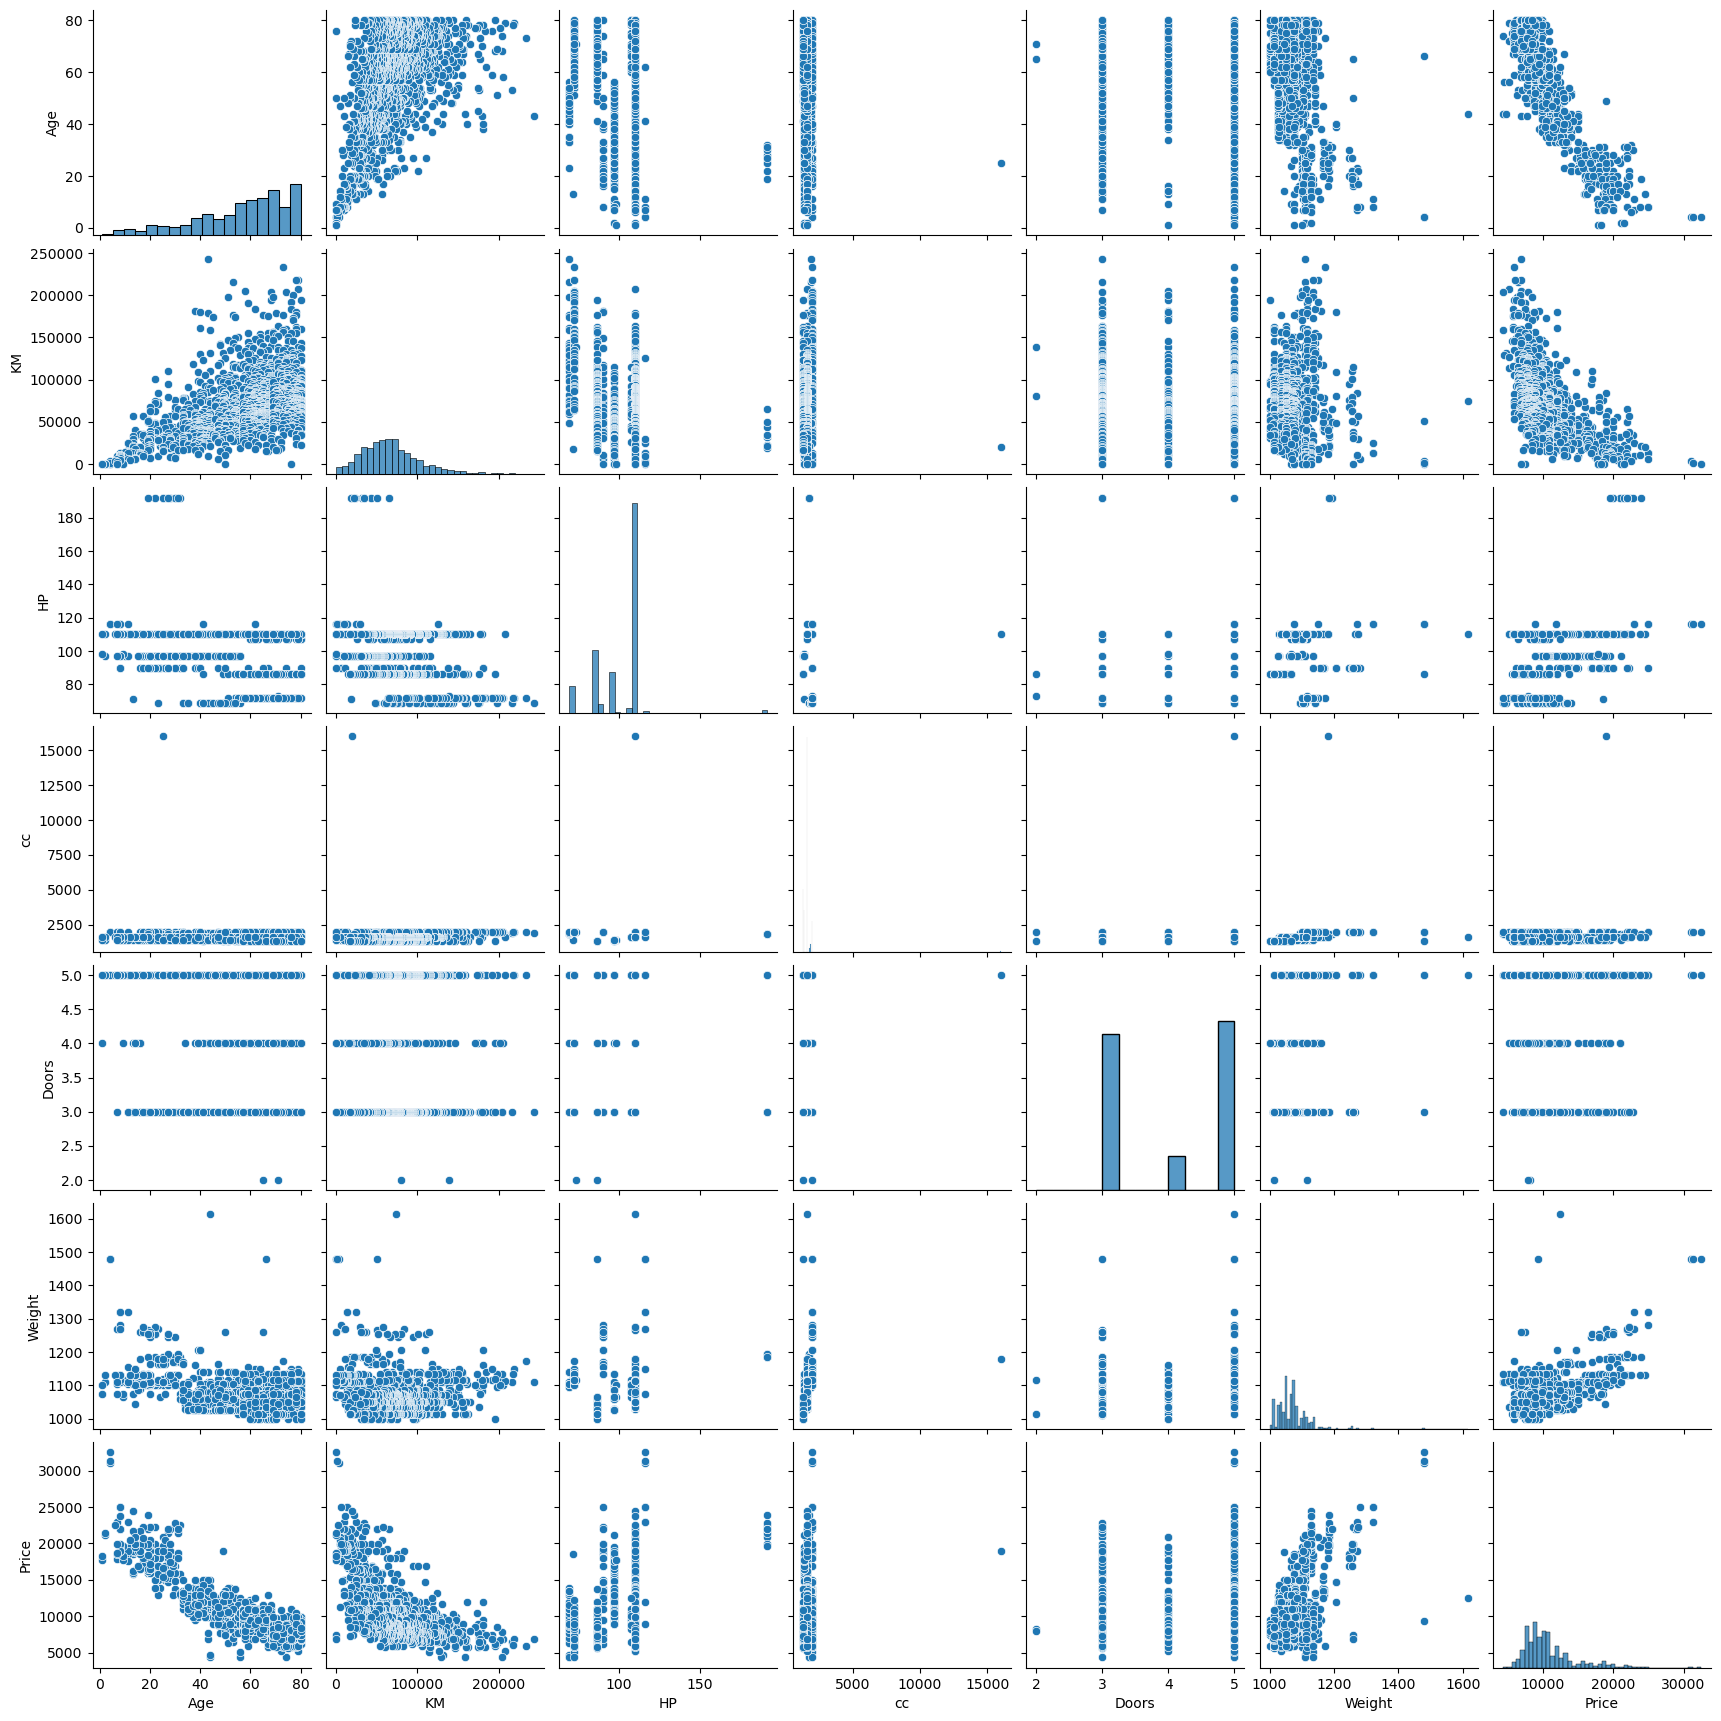

In [19]:
sns.pairplot(data1)

In [20]:
X = data1.iloc[:, :-1]
y = data1.iloc[:, -1]
 
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=0)

In [21]:
X_train

,Age,KM,HP,cc,Doors,Weight
609,67,174833,72,2000,4,1100
511,51,53408,110,1600,5,1080
878,60,61977,86,1300,3,1015
960,66,50806,86,1300,3,1480
303,39,39524,97,1398,3,1025
...,...,...,...,...,...,...
763,67,79762,86,1300,3,1015
835,67,67762,110,1600,3,1065
1216,70,85864,72,2000,5,1135
559,50,39706,110,1600,5,1080


In [22]:
y_train

609      5751
511     11900
878      8500
960      9390
303     11500
        ...  
763      9130
835      9750
1216     8500
559     13500
684      8950
Name: Price, Length: 1148, dtype: int64

### Model 1 

In [23]:
 model=smf.ols("Price~Age+KM+HP+cc+Weight+Doors",data=data1).fit()

In [24]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     1487.
Date:                Sat, 12 Oct 2024   Prob (F-statistic):               0.00
Time:                        12:58:48   Log-Likelihood:                -12385.
No. Observations:                1436   AIC:                         2.478e+04
Df Residuals:                    1429   BIC:                         2.482e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4235.4888    951.118     -4.453      0.000   -6101.226   -2369.751
Age         -122.4015      2.624    -46.654      0.000    -127.548    -117.255
KM            -0.0195      0.001    -16.079      0.000      -0.022      -0.017
HP            30.4777      2.548     11.963      0.000      25.480      35.475
cc            -0.0908      0.090     -1.010      0.313      -0.267       0.086
Weight        18.9692      0.868     21.866      0.000      17.267      20.671
Doors        -35.0659     39.367     -0.891      0.373    -112.289      42.158
==============================================================================
Omnibus:                      209.439   Durbin-Watson:                   1.576
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1661.538
Skew:                          -0.419   Prob(JB):                         0.00
Kurtosis:                       8.203   Cond. No.                     2.09e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
model.params

Intercept   -4235.488758
Age          -122.401535
KM             -0.019527
HP             30.477660
cc             -0.090831
Weight         18.969177
Doors         -35.065900
dtype: float64

In [26]:
model1_rsquared=model.rsquared
model1_aic=model.aic 
model1_bic=model.bic 

### Model 1 parameters

In [27]:
model1_rsquared,model1_aic,model1_bic

(0.8619469563049698, 24784.08943499001, 24820.976752237268)

In [134]:
np.sqrt(np.mean((data["Price"]-model.fittedvalues)**2))

1347.1471560509021

## Multi-Colinearity  ( Checking if any colums are related )

### VIF- Variance Inflation Factor

In [28]:
data1.columns

Index(['Age', 'KM', 'HP', 'cc', 'Doors', 'Weight', 'Price'], dtype='object')

VIF=1/(1-R**2)

In [29]:
def vif(r):
    return 1/(1-r**2)

In [30]:
age_rsquare=smf.ols("Age~KM+HP+cc+Weight+Doors",data=data1).fit().rsquared

In [31]:
age_vif=vif(age_rsquare)

In [32]:
km_rsquare=smf.ols("KM~Age+HP+cc+Weight+Doors",data=data1).fit().rsquared

In [33]:
km_vif=vif(km_rsquare)

In [34]:
hp_rsquare=smf.ols("HP~KM+Age+cc+Weight+Doors",data=data1).fit().rsquared

In [35]:
hp_vif=vif(hp_rsquare)

In [36]:
cc_rsquare=smf.ols("cc~KM+HP+Age+Weight+Doors",data=data1).fit().rsquared

In [37]:
cc_vif=vif(cc_rsquare)

In [38]:
weight_rsquare=smf.ols("Weight~KM+HP+cc+Age+Doors",data=data1).fit().rsquared

In [39]:
weight_vif=vif(weight_rsquare)

In [40]:
doors_rsquare=smf.ols("Doors~KM+HP+cc+Age+Weight",data=data1).fit().rsquared

In [41]:
doors_vif=vif(doors_rsquare)

In [42]:
vif_frame=pd.DataFrame({"Variables" : ['Age', 'KM', 'HP', 'cc', 'Weight',"Doors"],"VIF" : [age_vif,km_vif,hp_vif,cc_vif,weight_vif,doors_vif]})

In [43]:
vif_frame

,Variables,VIF
0,Age,1.277882
1,KM,1.176655
2,HP,1.016562
3,cc,1.016624
4,Weight,1.180064
5,Doors,1.009394


All VIF values are low 

### Residual Analysis

In [44]:
import statsmodels.api as sm

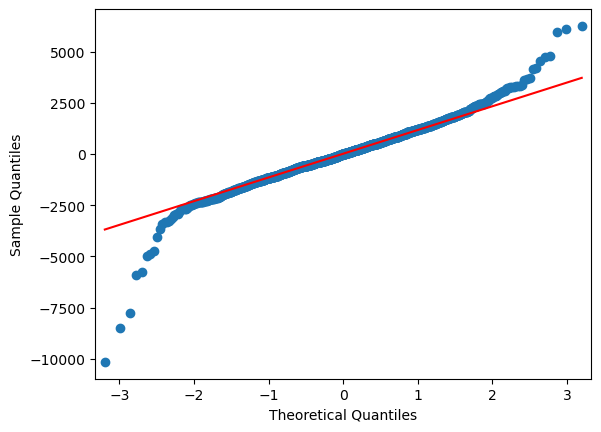

In [45]:
qqplot=sm.qqplot(model.resid,line="q")


#### Checking if Residues are normally distributed

C:\Users\amrit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


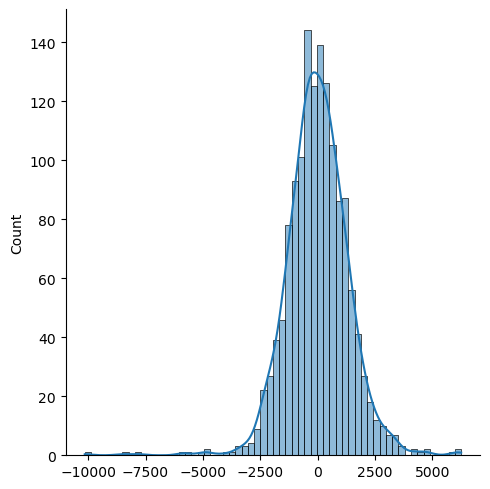

In [46]:
sns.displot(model.resid,kde=True)

Residual Plot for Homoscadesticity (plotting Y_hat vs Y-Y_hat)

In [47]:
def ztrans(val):
    return ((val-val.mean())/val.std())

In [48]:
import matplotlib.pyplot as plt

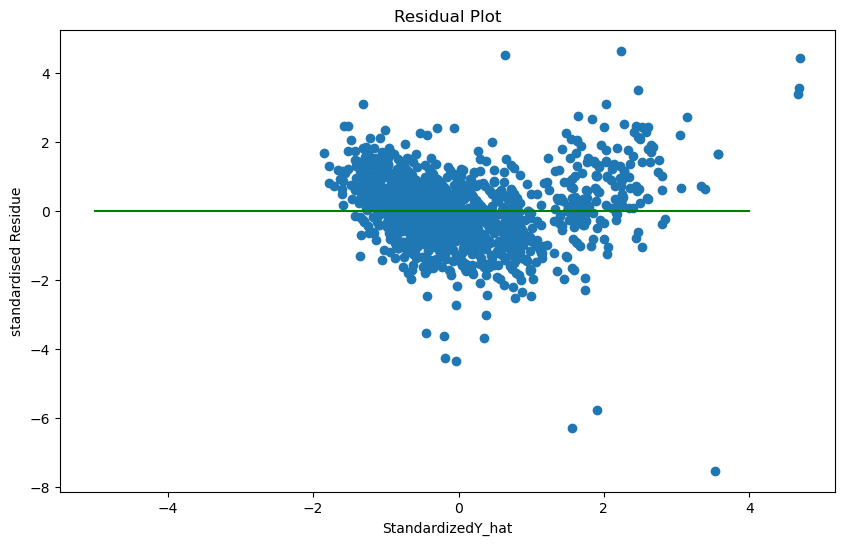

In [49]:
plt.figure(figsize=(10,6))
plt.scatter(ztrans(model.fittedvalues),ztrans(model.resid))
y=[0 for i in range(10)]
x=[j for j in range(-5,5) ]
plt.plot(x,y,color="g")
plt.title("Residual Plot")
plt.xlabel("StandardizedY_hat")
plt.ylabel("standardised Residue")
plt.show()

### Age vs Residual

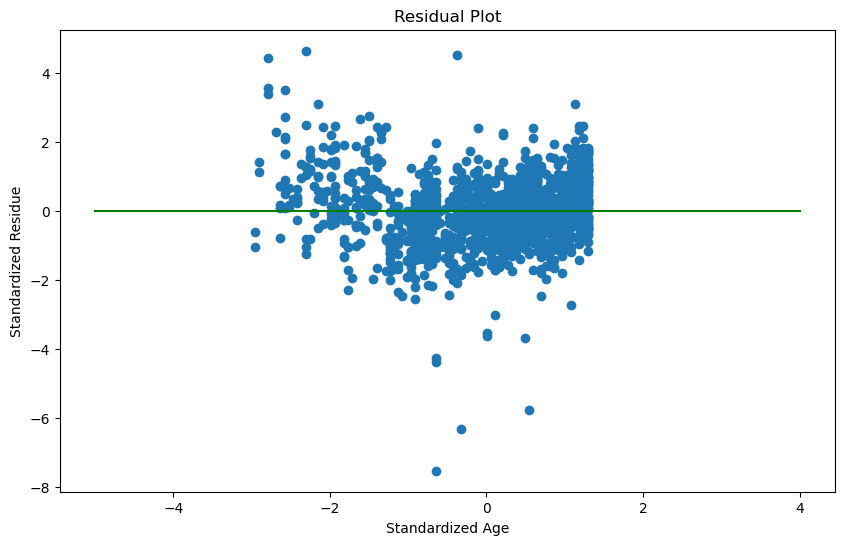

In [50]:
plt.figure(figsize=(10,6))
plt.scatter(ztrans(data1["Age"]),ztrans(model.resid))
y=[0 for i in range(10)]
x=[j for j in range(-5,5) ]
plt.plot(x,y,color="g")
plt.title("Residual Plot")
plt.xlabel("Standardized Age")
plt.ylabel("Standardized Residue")
plt.show()

### KM vs Residual

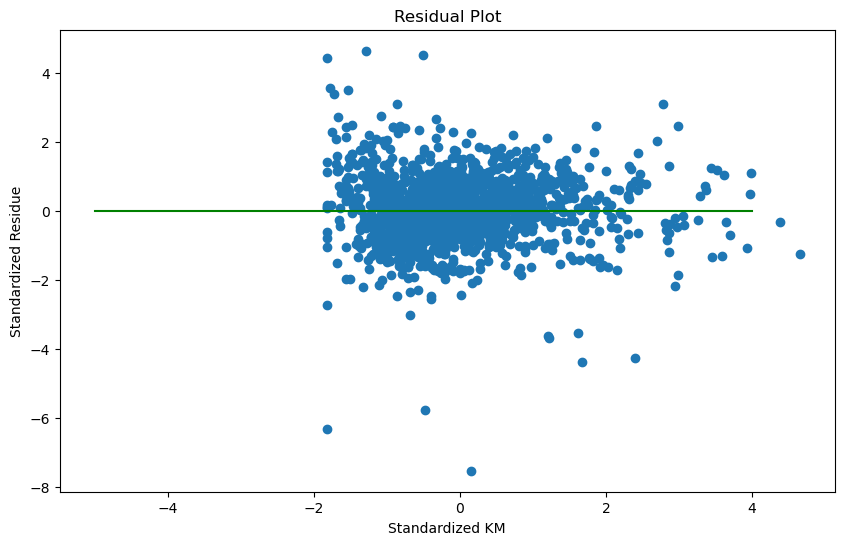

In [51]:
plt.figure(figsize=(10,6))
plt.scatter(ztrans(data1["KM"]),ztrans(model.resid))
y=[0 for i in range(10)]
x=[j for j in range(-5,5) ]
plt.plot(x,y,color="g")
plt.title("Residual Plot")
plt.xlabel("Standardized KM")
plt.ylabel("Standardized Residue")
plt.show()

HP VS Residue

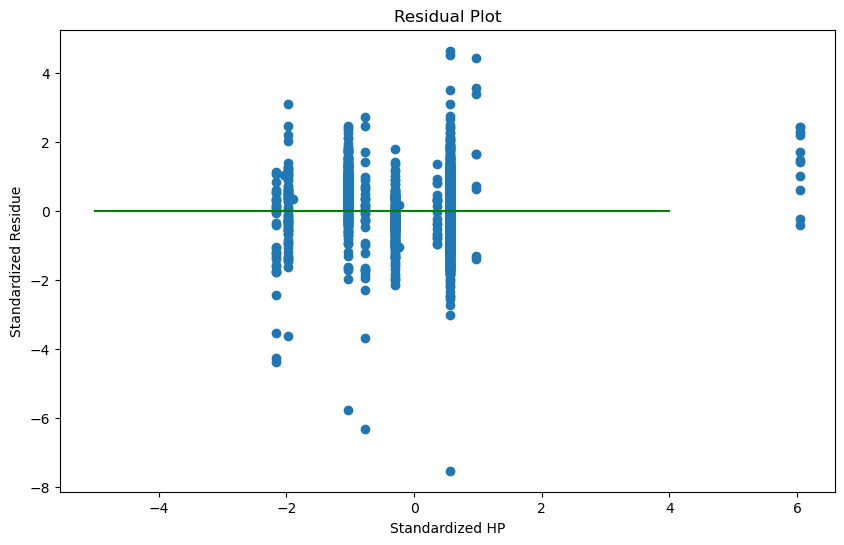

In [52]:
plt.figure(figsize=(10,6))
plt.scatter(ztrans(data1["HP"]),ztrans(model.resid))
y=[0 for i in range(10)]
x=[j for j in range(-5,5) ]
plt.plot(x,y,color="g")
plt.title("Residual Plot")
plt.xlabel("Standardized HP")
plt.ylabel("Standardized Residue")
plt.show()

CC vs Residue

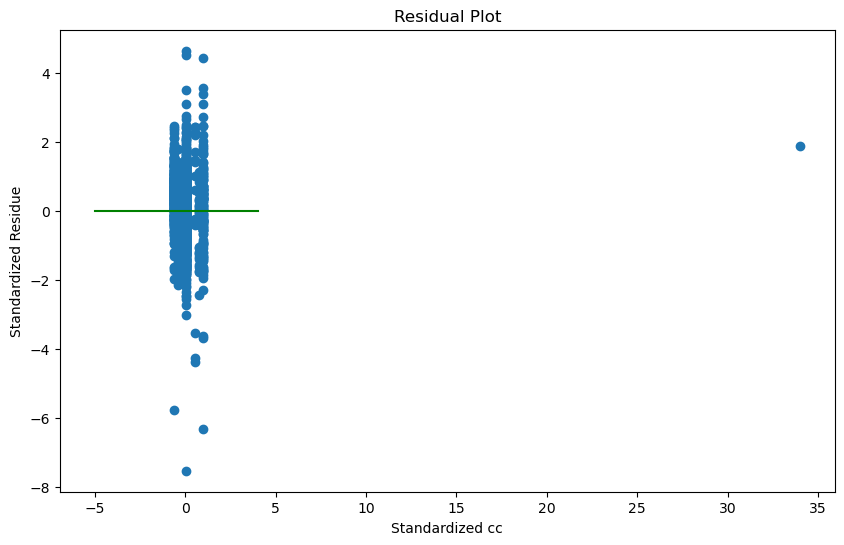

In [53]:
plt.figure(figsize=(10,6))
plt.scatter(ztrans(data1["cc"]),ztrans(model.resid))
y=[0 for i in range(10)]
x=[j for j in range(-5,5) ]
plt.plot(x,y,color="g")
plt.title("Residual Plot")
plt.xlabel("Standardized cc")
plt.ylabel("Standardized Residue")
plt.show()

Weight Vs Residue

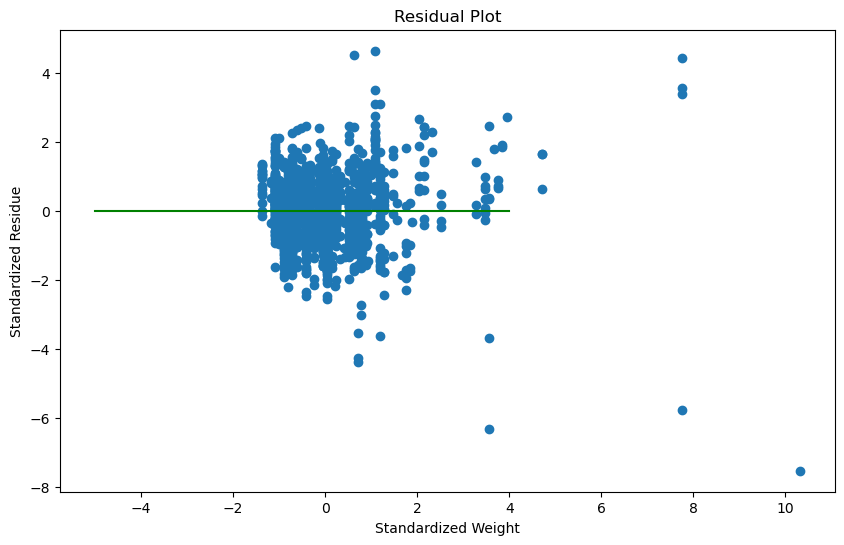

In [54]:
plt.figure(figsize=(10,6))
plt.scatter(ztrans(data1["Weight"]),ztrans(model.resid))
y=[0 for i in range(10)]
x=[j for j in range(-5,5) ]
plt.plot(x,y,color="g")
plt.title("Residual Plot")
plt.xlabel("Standardized Weight")
plt.ylabel("Standardized Residue")
plt.show()

Doors vs Residue

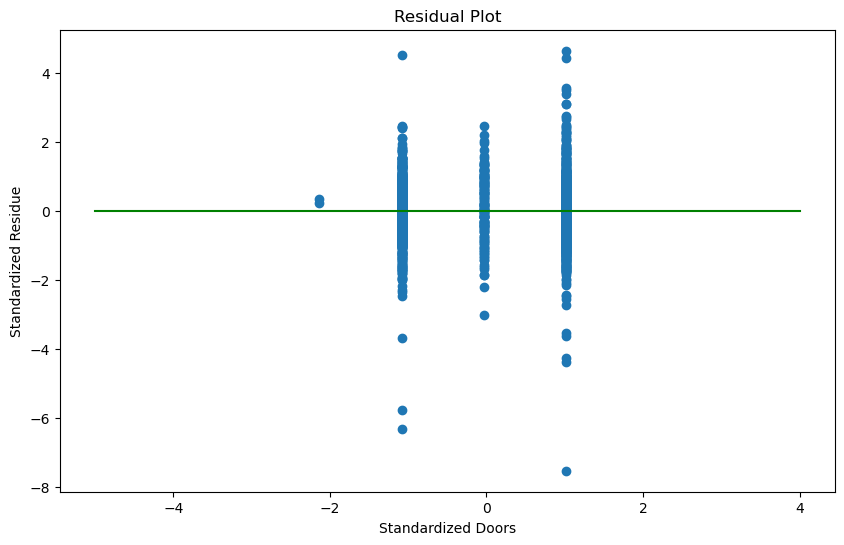

In [55]:
plt.figure(figsize=(10,6))
plt.scatter(ztrans(data1["Doors"]),ztrans(model.resid))
y=[0 for i in range(10)]
x=[j for j in range(-5,5) ]
plt.plot(x,y,color="g")
plt.title("Residual Plot")
plt.xlabel("Standardized Doors")
plt.ylabel("Standardized Residue")
plt.show()

### Detecting INfluence and Outliers

Cooks Distance

In [56]:
model_influence=model.get_influence()

In [57]:
(c,_)=model_influence.cooks_distance

In [58]:
c

array([4.96301242e-03, 2.88615825e-03, 3.58665492e-03, ...,
       5.72685265e-06, 7.89998358e-04, 1.18728817e-02])

In [59]:
import numpy as np

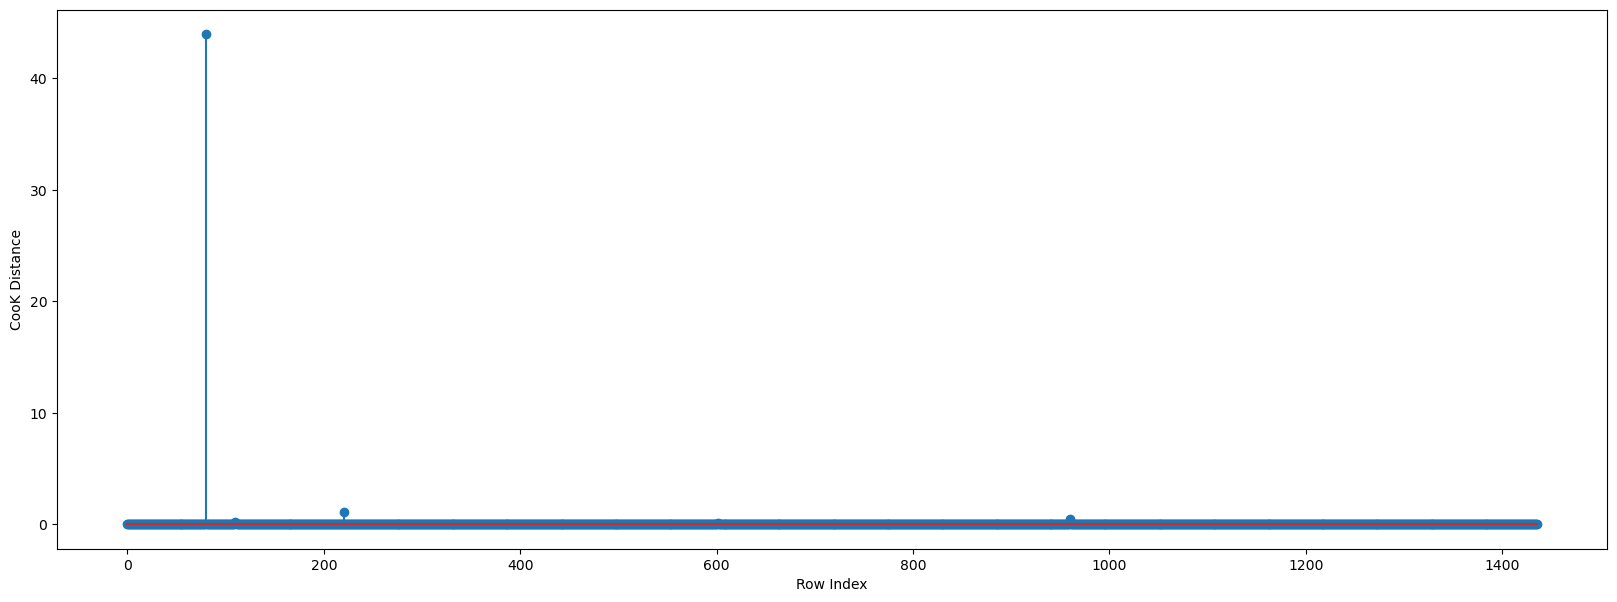

In [60]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data1)),np.round(c,3))
plt.xlabel("Row Index")
plt.ylabel("CooK Distance")
plt.show()

We are seeing extermely High Cook Distance possible Outlier

In [61]:
np.argmax(c),np.max(c) # index and value of Max C value 

(80, 43.952029513501955)

Outlier in index 80 

In [62]:
data1.loc[80]

Age          25
KM        20019
HP          110
cc        16000
Doors         5
Weight     1180
Price     18950
Name: 80, dtype: int64

In [63]:
data1.head()

,Age,KM,HP,cc,Doors,Weight,Price
0,23,46986,90,2000,3,1165,13500
1,23,72937,90,2000,3,1165,13750
2,24,41711,90,2000,3,1165,13950
3,26,48000,90,2000,3,1165,14950
4,30,38500,90,2000,3,1170,13750


By Comparing we can see the CC value of record 80 is very high 

#### High Influence Points

In [64]:
k=data1.shape[1] #no of columns
n=data1.shape[0] #no of datapoints/records
leverage_cutoff=3*((k+1)/n)

In [65]:
from statsmodels.graphics.regressionplots import influence_plot

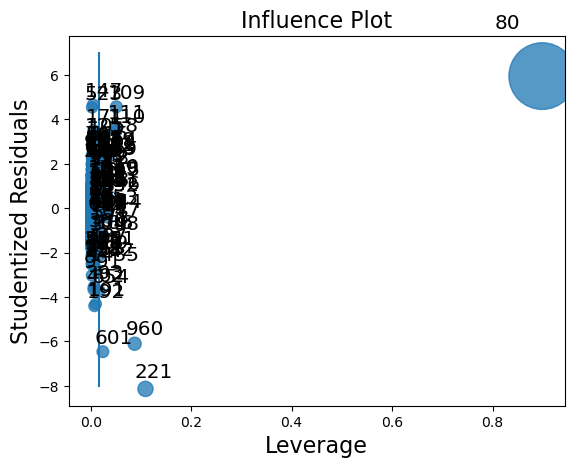

In [66]:

influence_plot(model,alpha=.05)
y=[i for i in range(-8,8)]
x=[leverage_cutoff for j in range(16)]
plt.plot(x,y)
plt.show()

Dropping Identified Outlier

In [67]:
data2=data1.drop(data1.index[80],axis=0).reset_index()

In [68]:
data2

,index,Age,KM,HP,cc,Doors,Weight,Price
0,0,23,46986,90,2000,3,1165,13500
1,1,23,72937,90,2000,3,1165,13750
2,2,24,41711,90,2000,3,1165,13950
3,3,26,48000,90,2000,3,1165,14950
4,4,30,38500,90,2000,3,1170,13750
...,...,...,...,...,...,...,...,...
1430,1431,69,20544,86,1300,3,1025,7500
1431,1432,72,19000,86,1300,3,1015,10845
1432,1433,71,17016,86,1300,3,1015,8500
1433,1434,70,16916,86,1300,3,1015,7250


In [69]:
data2=data2.drop(["index"],axis=1)

In [70]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     1435 non-null   int64
 1   KM      1435 non-null   int64
 2   HP      1435 non-null   int64
 3   cc      1435 non-null   int64
 4   Doors   1435 non-null   int64
 5   Weight  1435 non-null   int64
 6   Price   1435 non-null   int64
dtypes: int64(7)
memory usage: 78.6 KB


In [71]:
model_new=smf.ols("Price~Age+KM+HP+cc+Weight+Doors",data=data2).fit()

In [72]:
model2_bic=model_new.bic
model2_aic=model_new.aic
model2_rsquared=model_new.rsquared

<StemContainer object of 3 artists>

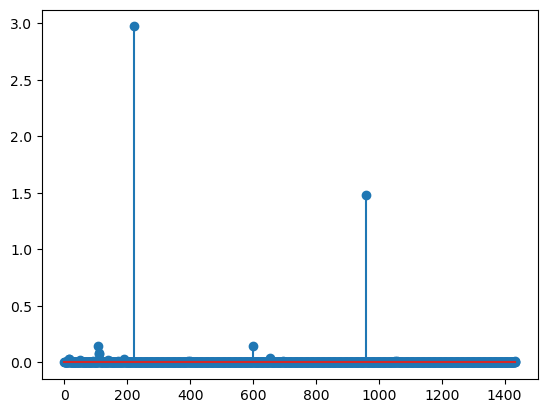

In [73]:
model_influence=model_new.get_influence()
(c,_)=model_influence.cooks_distance
plt.stem(np.arange(len(data2)),np.round(c,3))

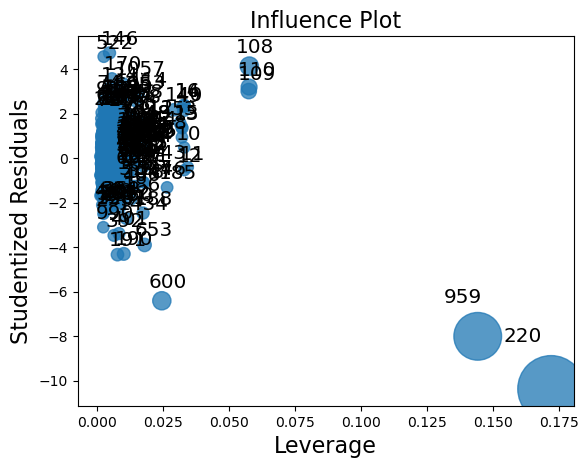

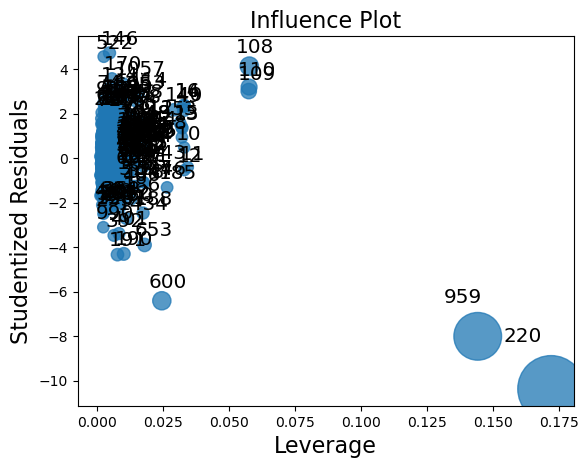

In [74]:
influence_plot(model_new,alpha=.05)


Further Dropping 220 , 959 index records

In [75]:
data2.loc[[220,959]]

,Age,KM,HP,cc,Doors,Weight,Price
220,44,74172,110,1600,5,1615,12450
959,66,50806,86,1300,3,1480,9390


In [108]:
data2.head()

,Age,KM,HP,cc,Doors,Weight,Price
0,23,46986,90,2000,3,1165,13500
1,23,72937,90,2000,3,1165,13750
2,24,41711,90,2000,3,1165,13950
3,26,48000,90,2000,3,1165,14950
4,30,38500,90,2000,3,1170,13750


In [109]:
data3=data2.drop(data2.index[[220,959]],axis=0).reset_index()

In [110]:
data3.head()

,index,Age,KM,HP,cc,Doors,Weight,Price
0,0,23,46986,90,2000,3,1165,13500
1,1,23,72937,90,2000,3,1165,13750
2,2,24,41711,90,2000,3,1165,13950
3,3,26,48000,90,2000,3,1165,14950
4,4,30,38500,90,2000,3,1170,13750


In [79]:
model_3=smf.ols("Price~Age+KM+HP+cc+Weight+Doors",data=data3).fit()

In [80]:
model3_bic=model_3.bic
model3_aic=model_3.aic
model3_rsquared=model_3.rsquared

<StemContainer object of 3 artists>

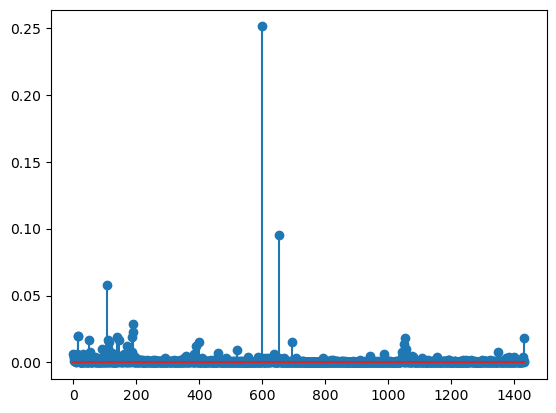

In [81]:
model_influence=model_3.get_influence()
(c,_)=model_influence.cooks_distance
plt.stem(np.arange(len(data3)),np.round(c,3))

All values are below .5 hence we can consider good 

## Predicting for new data

In [82]:
data3.head()

,index,Age,KM,HP,cc,Doors,Weight,Price
0,0,23,46986,90,2000,3,1165,13500
1,1,23,72937,90,2000,3,1165,13750
2,2,24,41711,90,2000,3,1165,13950
3,3,26,48000,90,2000,3,1165,14950
4,4,30,38500,90,2000,3,1170,13750


In [83]:
X = data3.iloc[:, :-1]
y = data3.iloc[:, -1]
 
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=0)

In [84]:
X_test

,index,Age,KM,HP,cc,Doors,Weight
1059,1061,80,160000,86,1300,3,1015
411,412,51,98040,110,1600,5,1080
342,343,33,28715,110,1600,5,1075
1295,1297,78,71186,110,1600,3,1050
483,484,50,62280,97,1400,5,1060
...,...,...,...,...,...,...,...
1045,1047,74,203254,72,2000,3,1135
1309,1311,79,68945,110,1600,5,1085
520,521,53,49969,110,1600,5,1075
993,995,67,42102,110,1600,5,1075


In [85]:
y_hat=round(model_3.predict(X_test))

In [86]:
y_yhat=pd.DataFrame({"y":y_test,"y_predicted":y_hat})

In [87]:
y_yhat

,y,y_predicted
1059,6750,5233.0
411,11950,11099.0
342,12950,14084.0
1295,7500,7824.0
483,10500,11385.0
...,...,...
1045,4400,6282.0
1309,9950,8588.0
520,9650,11491.0
993,9950,10045.0


RMSE

In [133]:
np.sqrt(np.mean((y_yhat["y"]-y_yhat["y_predicted"])**2)) 

1189.2983921225264

### Comparing Models

In [88]:
model3_bic=model_3.bic
model3_aic=model_3.aic
model3_rsquared=model_3.rsquared
model2_bic=model_new.bic
model2_aic=model_new.aic
model2_rsquared=model_new.rsquared
model1_rsquared=model.rsquared
model1_aic=model.aic 
model1_bic=model.bic 
model_par=pd.DataFrame({"Model":["Model1","Model2","Model3"],"Rsquare":[model1_rsquared,model2_rsquared,model3_rsquared],"AIC":[model1_aic,model2_aic,model3_aic],"BIC":[model1_bic,model2_bic,model3_bic]})

In [89]:
model_par

,Model,Rsquare,AIC,BIC
0,Model1,0.861947,24784.089435,24820.976752
1,Model2,0.864810,24732.618660,24769.501101
2,Model3,0.883398,24487.845442,24524.718120


Hence we can see Model 3 has higher Rsquare Value and lesser AIC,BIC values than model 1&2


In [111]:
data3.head()

,index,Age,KM,HP,cc,Doors,Weight,Price
0,0,23,46986,90,2000,3,1165,13500
1,1,23,72937,90,2000,3,1165,13750
2,2,24,41711,90,2000,3,1165,13950
3,3,26,48000,90,2000,3,1165,14950
4,4,30,38500,90,2000,3,1170,13750


In [112]:
data3["Doors"].corr(data["Price"])

0.12548504088769605

In [113]:
data3["Age"].corr(data["Price"])

-0.8682439449388839

In [114]:
data3["KM"].corr(data["Price"])

-0.5499054803016913

In [115]:
data3["HP"].corr(data["Price"])

0.26344970269058937

In [116]:
data3["cc"].corr(data["Price"])

0.0954029651537962

In [117]:
data3["Weight"].corr(data["Price"])

0.5321075900947368

In [118]:
data3=data3.drop(["Doors"],axis=1)

In [120]:
data3.columns

Index(['index', 'Age', 'KM', 'HP', 'cc', 'Weight', 'Price'], dtype='object')

In [121]:
data3=data3.drop(['cc'],axis=1)

In [122]:
data3.head()

,index,Age,KM,HP,Weight,Price
0,0,23,46986,90,1165,13500
1,1,23,72937,90,1165,13750
2,2,24,41711,90,1165,13950
3,3,26,48000,90,1165,14950
4,4,30,38500,90,1170,13750


In [125]:
model4=smf.ols("Price~Age+KM+HP+Weight",data=data3).fit()

In [128]:
model4.rsquared , model4.aic , model4.bic

(0.8711906386310598, 24626.52136534782, 24652.858992486963)

In [129]:
model_par

,Model,Rsquare,AIC,BIC
0,Model1,0.861947,24784.089435,24820.976752
1,Model2,0.864810,24732.618660,24769.501101
2,Model3,0.883398,24487.845442,24524.718120


<StemContainer object of 3 artists>

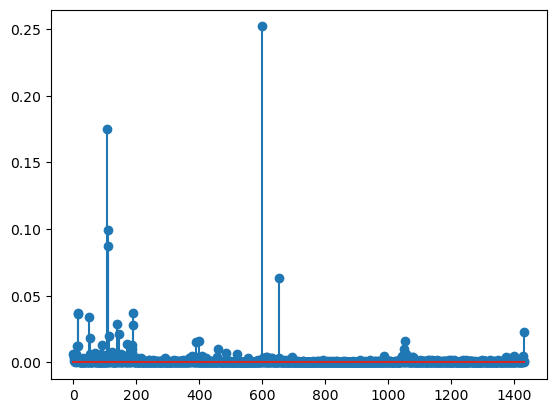

In [130]:
model_influence=model4.get_influence()
(c,_)=model_influence.cooks_distance
plt.stem(np.arange(len(data3)),np.round(c,3))